In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [6]:

from scipy.stats import rv_continuous
from scipy.interpolate import interp1d
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad, nquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
from py_unsio import *
import os
import datetime
import wkbl
from wkbl.astro.halo_info import *
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter

In [11]:
%%latex
\begin{equation}
\dot{a}= H_0 a \sqrt{\Omega_m a^{-3} +\Omega_k a^{-2}+\Omega_{\Lambda}}
\end{equation}

<IPython.core.display.Latex object>

In [40]:

def a_dot(a,h0,omg_m, omg_l):
    omg_k = 1- omg_m - omg_l
    return h0 * a * np.sqrt((omg_m*a**(-3))+(omg_k*a**(-2))+omg_l)

def rho_crit(a, h0, omg_m, omg_l, G):
    H_z = a_dot(a,h0,omg_m, omg_l) / a
    return 3. * H_z**2 /8. / np.pi / G
    
    

In [41]:
msuntokg = 1.99844e30
pctocm = 3.08567758e18
G = 6.67384e-11 * msuntokg / ((pctocm*10)**3)
omega_m = 0.3
omega_l = 0.69
H_0=67.
rho_C = np.vectorize(rho_crit)
a_dotss = np.vectorize(a_dot)

print rho_crit(.5,67.7,0.3,0.691,G)/ 3.08567758e19**2

395.7949551106462


<IPython.core.display.Javascript object>


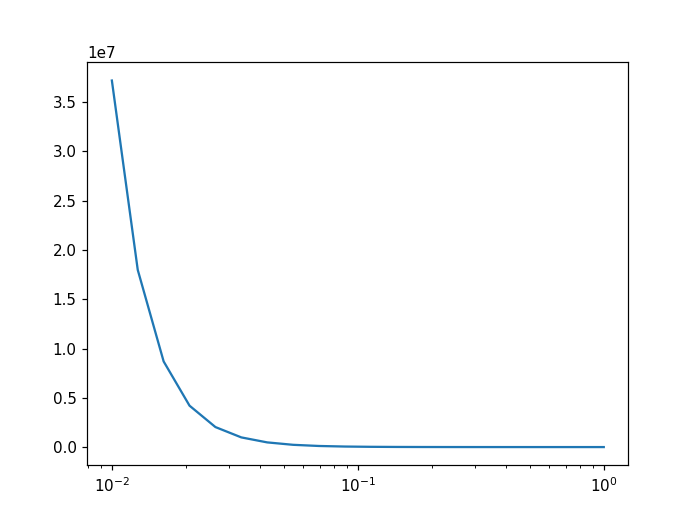

In [42]:
aes = np.logspace(-2,0,20)
fig, ax = plt.subplots()
ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot(aes , rho_C(aes, H_0, omega_m, omega_l,G)/ 3.08567758e19**2 )